# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress
from datetime import datetime
from pprint import pprint


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "/Users/vrindapatel/Documents/GitHub/python-api-challenge/output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# check the api keys.py file in the starter code folder.
from api_keys import weather_api_key
print(weather_api_key)
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)


34019506a14f335ceb1a6eb9d2198750
http://api.openweathermap.org/data/2.5/weather?appid=34019506a14f335ceb1a6eb9d2198750&units=imperial&q=


In [3]:
# configure geopy key from apy_keys.py file
from api_keys import geoapify_api_key



### Generate the Cities List by Using the `citipy` Library

In [34]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


In [35]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [39]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Loop through the list of cities and perform a request for data on each
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        pass

# Print to logger
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 : ushuaia
Processing Record 2 of Set 1 : edinburgh of the seven seas
Processing Record 3 of Set 1 : xiuyan
City not found. Skipping...
Processing Record 4 of Set 1 : ribeira grande
Processing Record 5 of Set 1 : sim
Processing Record 6 of Set 1 : quesnel
Processing Record 7 of Set 1 : port-aux-francais
Processing Record 8 of Set 1 : tamanrasset
Processing Record 9 of Set 1 : albany
Processing Record 10 of Set 1 : kodiak
Processing Record 11 of Set 1 : san patricio
Processing Record 12 of Set 1 : acapulco de juarez
Processing Record 13 of Set 1 : olonkinbyen
City not found. Skipping...
Processing Record 14 of Set 1 : puerto ayora
City not found. Skipping...
Processing Record 15 of Set 1 : powell river
Processing Record 16 of Set 1 : grytviken
Processing Record 17 of Set 1 : west island
Processing Record 18 of Set 1 : la carlota
Processing Record 19 of Set 1 : tucurui
Processing Record 20 of Set 1 : 

In [40]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

# Show Record Count
city_data_df.count()

City          594
Cloudiness    594
Country       594
Date          594
Humidity      594
Lat           594
Lng           594
Max Temp      594
Wind Speed    594
dtype: int64

In [41]:
# Display sample data
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,100,AR,1713758915,96,-54.8000,-68.3000,33.98,4.68
1,Edinburgh of the Seven Seas,45,SH,1713758915,89,-37.0676,-12.3116,63.75,22.41
2,Xiuyan,74,CN,1713758915,55,40.2928,123.2744,67.03,11.41
3,Ribeira Grande,100,PT,1713758916,76,38.5167,-28.7000,58.75,9.33
4,Sim,100,RU,1713758917,64,54.9930,57.6982,66.36,3.58


In [42]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/vrindapatel/Documents/GitHub/python-api-challenge/output_data/cities.csv", index_label="City_ID")

In [43]:
# Read saved data
city_data_df = pd.read_csv("/Users/vrindapatel/Documents/GitHub/python-api-challenge/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
0,Ushuaia,100,AR,1713758915,96,-54.8000,-68.3000,33.98,4.68
1,Edinburgh of the Seven Seas,45,SH,1713758915,89,-37.0676,-12.3116,63.75,22.41
2,Xiuyan,74,CN,1713758915,55,40.2928,123.2744,67.03,11.41
3,Ribeira Grande,100,PT,1713758916,76,38.5167,-28.7000,58.75,9.33
4,Sim,100,RU,1713758917,64,54.9930,57.6982,66.36,3.58


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

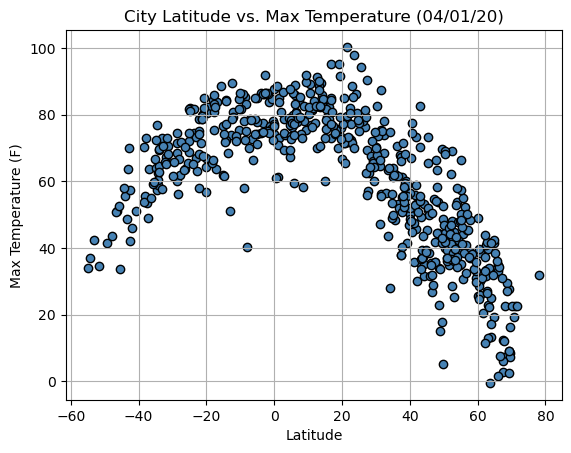

In [45]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor = "steelblue", edgecolor = "black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("/Users/vrindapatel/Documents/GitHub/python-api-challenge/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

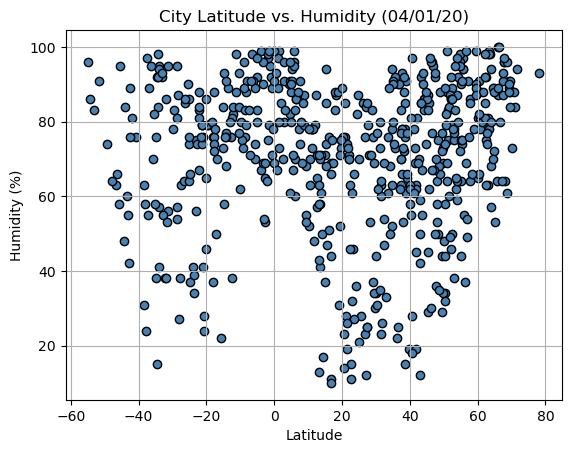

In [46]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("/Users/vrindapatel/Documents/GitHub/python-api-challenge/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

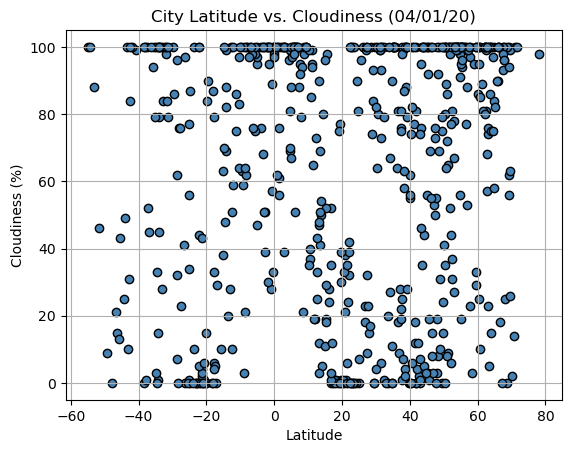

In [47]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("/Users/vrindapatel/Documents/GitHub/python-api-challenge/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

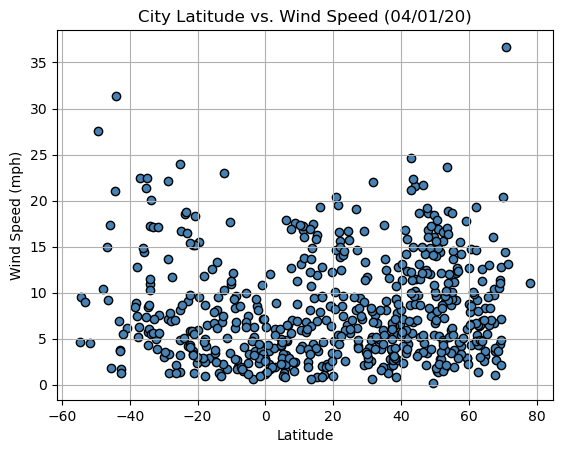

In [48]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("/Users/vrindapatel/Documents/GitHub/python-api-challenge/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [58]:
# Define a function to create Linear Regression plots
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

In [59]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()


# Display sample data
northern_hemi_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
2,Xiuyan,74,CN,1713758915,55,40.2928,123.2744,67.03,11.41
3,Ribeira Grande,100,PT,1713758916,76,38.5167,-28.7000,58.75,9.33
4,Sim,100,RU,1713758917,64,54.9930,57.6982,66.36,3.58
5,Quesnel,100,CA,1713758917,38,52.9999,-122.5029,44.89,8.95
7,Tamanghasset,100,DZ,1713758918,11,22.7850,5.5228,72.27,9.62


In [60]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

# Display sample data
southern_hemi_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
0,Ushuaia,100,AR,1713758915,96,-54.8000,-68.3000,33.98,4.68
1,Edinburgh of the Seven Seas,45,SH,1713758915,89,-37.0676,-12.3116,63.75,22.41
6,Port-aux-Français,9,TF,1713758918,74,-49.3500,70.2167,41.34,27.60
13,Puerto Ayora,57,EC,1713758921,89,-0.7393,-90.3518,76.23,7.14
15,Grytviken,100,GS,1713758923,86,-54.2811,-36.5092,37.02,9.51


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is : -0.86


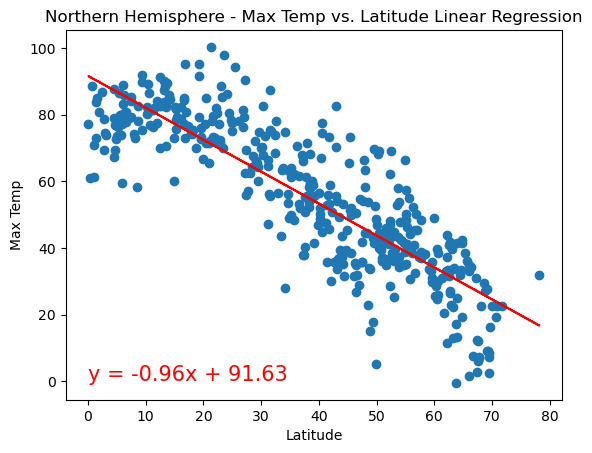

In [62]:
# Linear regression scatter plot on Northern Hemisphere - Max Temp vs. Latitude 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
line_eq = linear_agression(x_values,y_values)
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.savefig("/Users/vrindapatel/Documents/GitHub/python-api-challenge/output_data/Fig5.png")
plt.show()



The r-squared is : 0.72


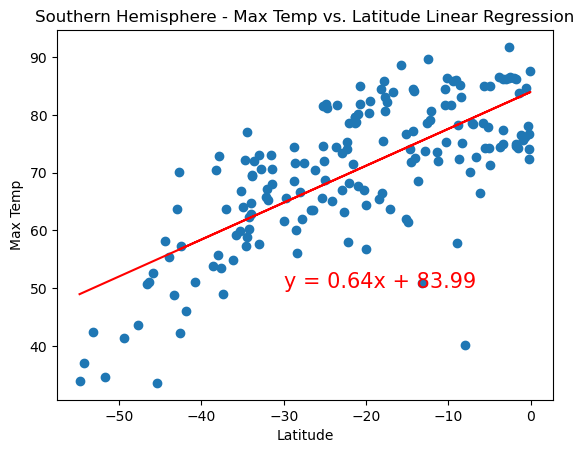

In [63]:
# Linear regression on Southern Hemisphere - Max Temp vs. Latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
line_eq = linear_agression(x_values,y_values)
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.savefig("/Users/vrindapatel/Documents/GitHub/python-api-challenge/output_data/Fig6.png")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is : 0.18


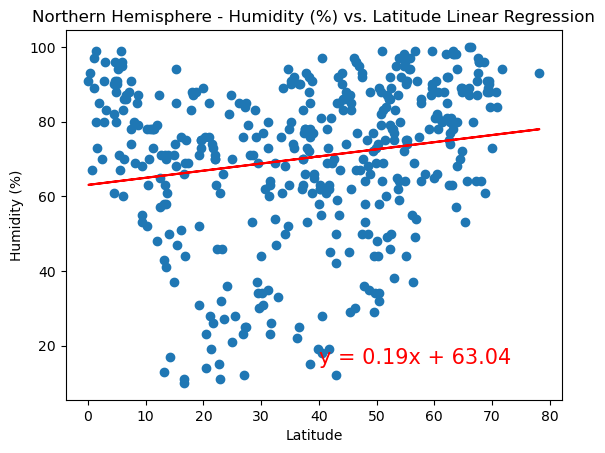

In [64]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
line_eq = linear_agression(x_values,y_values)
plt.annotate(line_eq,(40,15),fontsize=15,color="red")
plt.savefig("/Users/vrindapatel/Documents/GitHub/python-api-challenge/output_data/Fig7.png")
plt.show()


The r-value is: 0.0002808747046324607


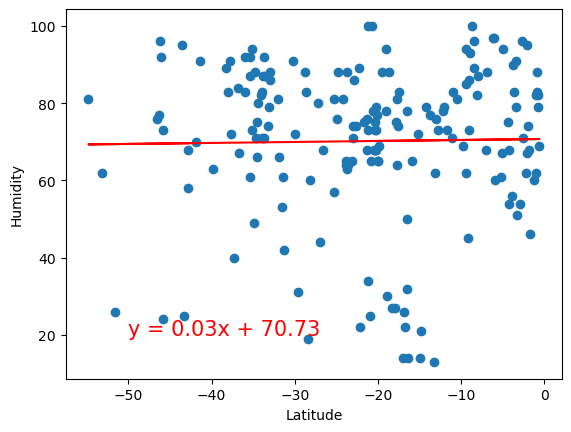

In [18]:
# Southern Hemisphere

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is : 0.12


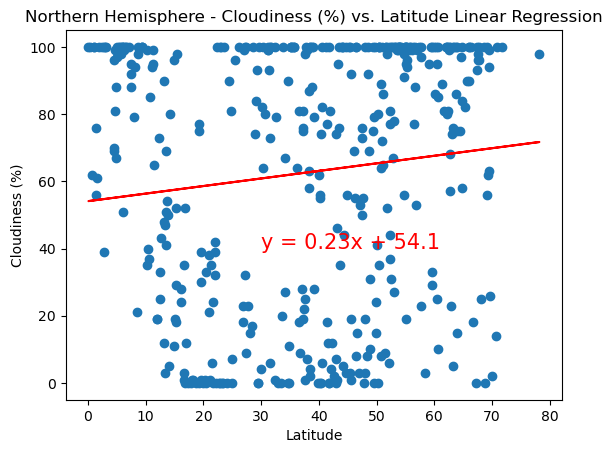

In [65]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
line_eq = linear_agression(x_values,y_values)
plt.annotate(line_eq,(30,40),fontsize=15,color="red")
plt.savefig("/Users/vrindapatel/Documents/GitHub/python-api-challenge/output_data/Fig8.png")
plt.show()


The r-squared is : 0.17


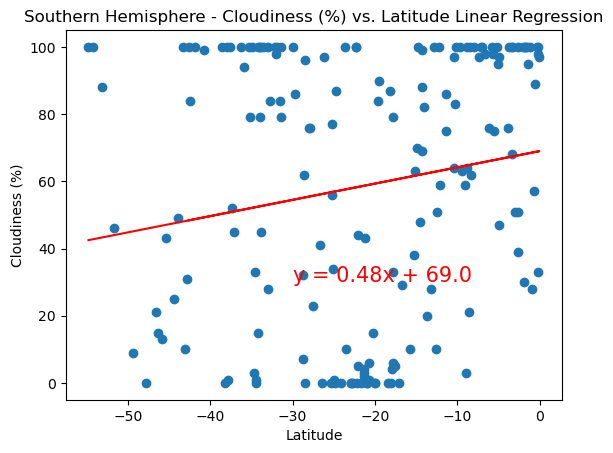

In [66]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
line_eq = linear_agression(x_values,y_values)
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.savefig("/Users/vrindapatel/Documents/GitHub/python-api-challenge/output_data/Fig9.png")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is : 0.14


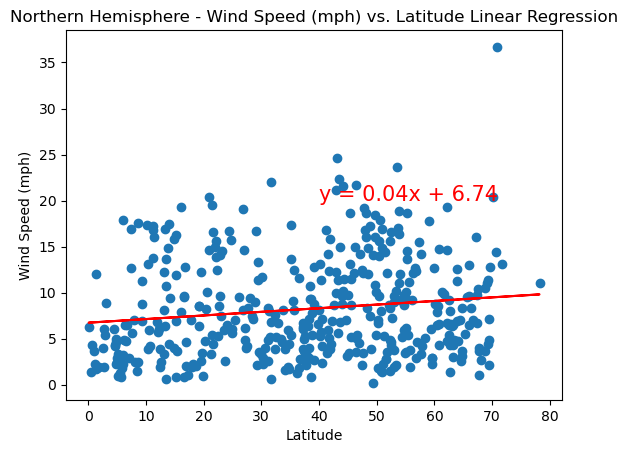

In [67]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
line_eq = linear_agression(x_values,y_values)
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.savefig("/Users/vrindapatel/Documents/GitHub/python-api-challenge/output_data/Fig10.png")
plt.show()

The r-squared is : -0.33


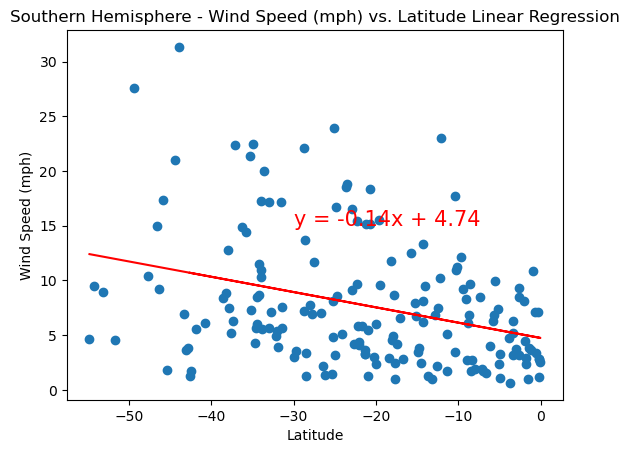

In [68]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
line_eq = linear_agression(x_values,y_values)
plt.annotate(line_eq,(-30,15),fontsize=15,color="red")
plt.savefig("/Users/vrindapatel/Documents/GitHub/python-api-challenge/output_data/Fig11.png")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE